# **Ujian Akhir Semester Penambangan Data(E)**

## **Prediksi Risiko Diabetes Berdasarkan CDC Diabetes Health Indicators**

## **Pendahuluan**

Diabetes adalah sebuah krisis kesehatan global, sebuah kondisi kronis yang memengaruhi jutaan orang dan menjadi penyebab utama komplikasi serius seperti penyakit jantung, gagal ginjal, dan kehilangan penglihatan. Mengidentifikasi risiko diabetes sejak dini sangat penting untuk meminimalkan dampak buruk dan meningkatkan kualitas hidup individu. Salah satu strategi yang efektif dalam pencegahan dan pengelolaan diabetes adalah melalui analisis komprehensif indikator kesehatan populasi.

Pusat Pengendalian dan Pencegahan Penyakit (CDC) telah mengumpulkan serangkaian Indikator Kesehatan Diabetes CDC yang dirancang khusus untuk mengidentifikasi faktor-faktor risiko yang berkontribusi terhadap perkembangan diabetes. Kumpulan data yang kaya ini mencakup berbagai aspek seperti gaya hidup, parameter fisik, dan riwayat kesehatan individu, menjadikannya sumber daya yang tak ternilai untuk mengembangkan sistem prediksi dan klasifikasi risiko diabetes yang akurat.


## **Data Understanding**

### **Sumber Data**

Dataset dapat diakses pada tautan berikut:
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

 Pusat Pengendalian dan Pencegahan Penyakit (CDC), lembaga kesehatan masyarakat nasional utama di Amerika Serikat. Data ini dikumpulkan sebagai bagian dari Sistem Pengawasan Faktor Risiko Perilaku (BRFSS), sebuah survei berbasis telepon berskala nasional yang mencakup berbagai negara bagian di AS.  

### **Tujuan**

Tujuan dari dataset ini adalah untuk membangun model prediksi yang kuat. Model ini akan dirancang untuk menilai kemungkinan seseorang mengidap diabetes berdasarkan indikator kesehatan yang tersedia. Tujuan akhir dari model ini adalah untuk mendukung pengambilan keputusan medis yang lebih baik dan memfasilitasi perancangan strategi intervensi dini yang dapat secara signifikan meningkatkan hasil kesehatan masyarakat.

### **Integrasi Data**

Untuk memulai proses analisis, langkah pertama yang krusial adalah mengunduh dan mengimpor dataset ini ke dalam lingkungan pemrograman pilihan kita, seperti Python. Berkat ketersediaannya di UCI Machine Learning Repository, dataset dapat langsung diakses dan diintegrasikan dengan mulus untuk diproses lebih lanjut.

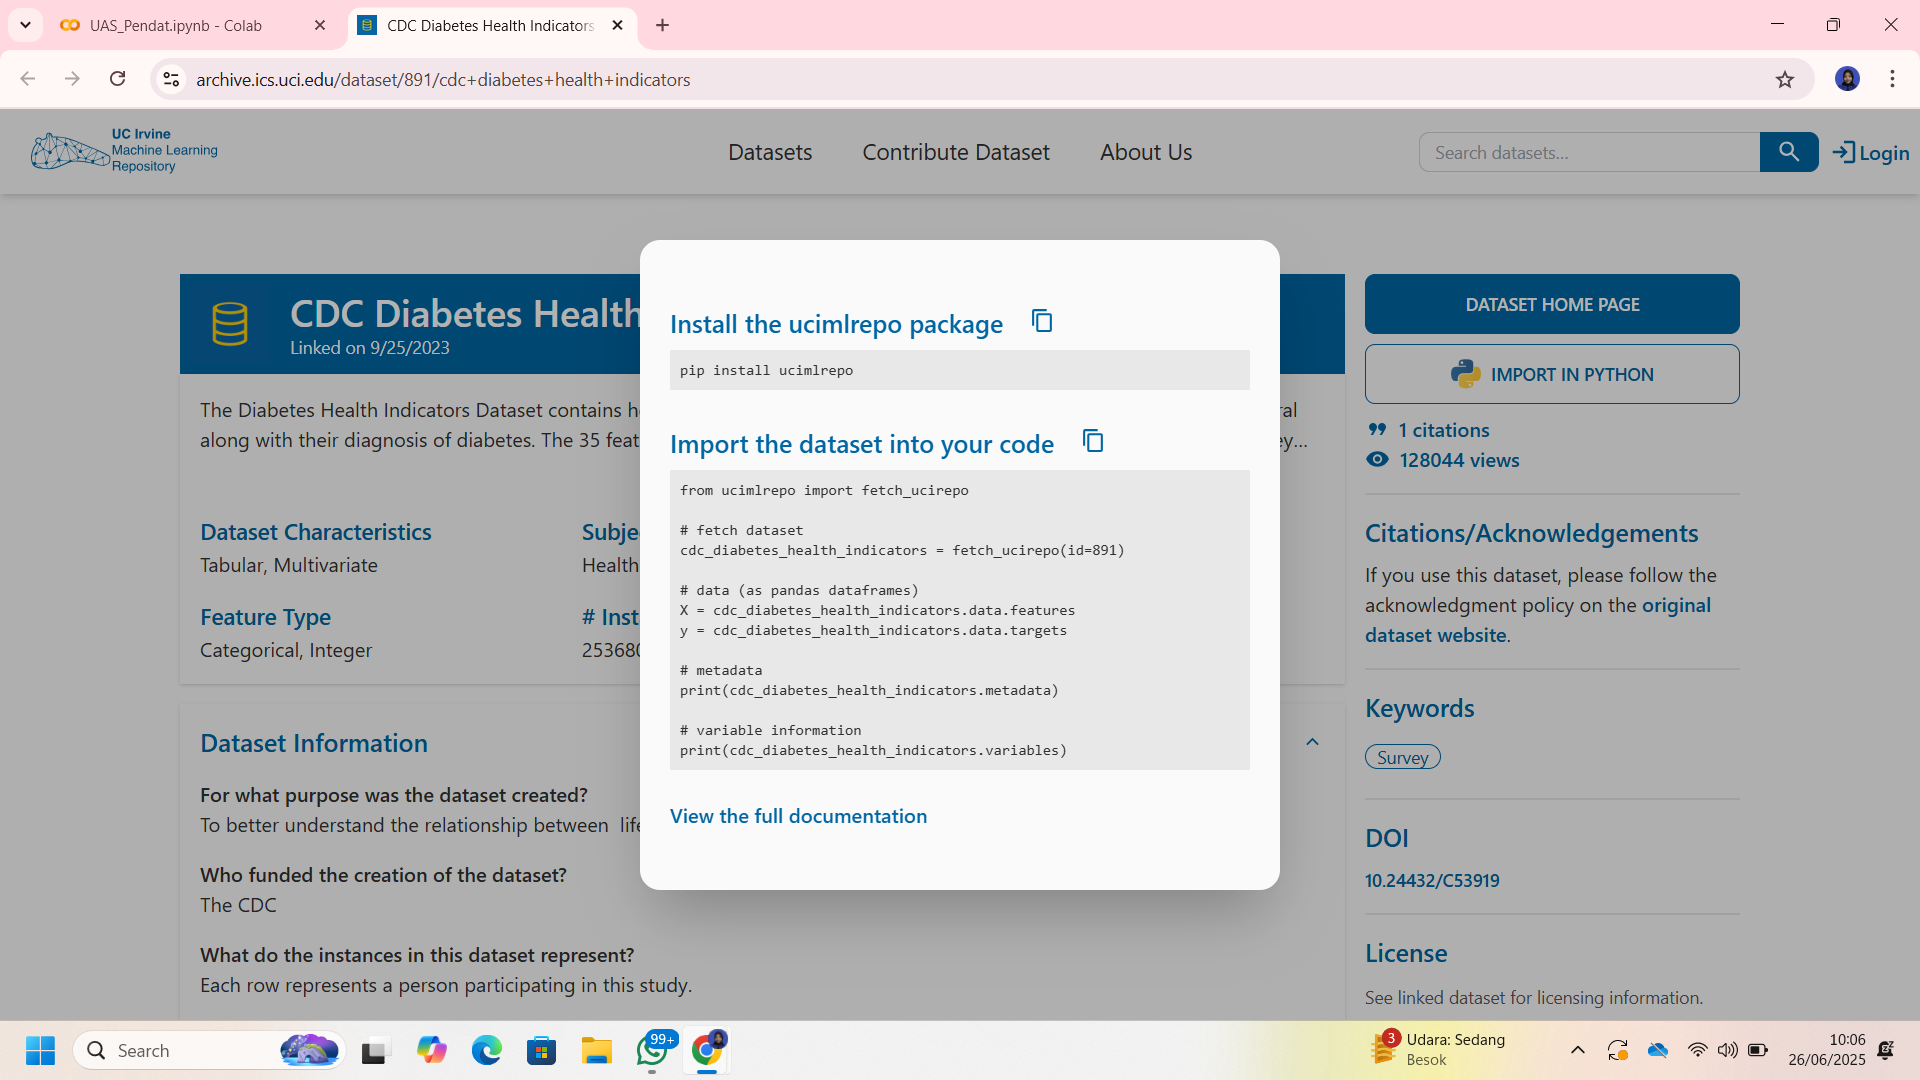

## **Visualisasi Data**

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
import pandas as pd

# Gabungkan fitur dan target
df_diabetes = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_diabetes))
print("Visualisasi dataset diabetes")
print(df_diabetes.to_string(index=False))


Streaming output truncated to the last 5000 lines.
      1         0          1   24       0       0                     0             1       1        0                  0              1            0        3         0         0         0    1    8          6       8                0
      0         1          1   26       1       0                     0             1       1        1                  0              1            0        2         0         0         0    0   10          5       7                0
      0         1          1   26       0       0                     0             1       1        1                  0              1            0        1         0         0         0    1   11          6       8                0
      1         1          1   28       1       0                     1             0       1        1                  0              1            0        4         1         1         0    0   12          4       3                0
      0  

In [ ]:
# Simpan ke file CSV
df_diabetes.to_csv('datasetdiabetes.csv', index=False)

## **Preprocessing Data**

### Transformasi Data

Kode ini memuat data dari file CSV ke dalam DataFrame df, lalu mengubah nilai numerik (0 dan 1) di kolom 'Diabetes_binary' menjadi label teks 'Non Diabetes' dan 'Diabetes' untuk kejelasan.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load dataset
df = pd.read_csv('/content/datasetdiabetes.csv')

# 2. Ubah nilai pada kolom 'Diabetes_binary' menjadi kategorikal
df['Diabetes_binary'] = df['Diabetes_binary'].map({0: 'Non Diabetes', 1: 'Diabetes'})

## **Splitting Data**

Kode tersebut memisahkan data menjadi input dan output. X menampung seluruh fitur (variabel independen) yang akan digunakan untuk membuat prediksi, sedangkan y adalah variabel target (dependen), yaitu kolom 'Diabetes_binary'.

In [ ]:
# 3. Splitting fitur dan target
X = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']

## **Visualisasi data setelah diubah ke kategorikal**

Kode ini bertujuan untuk merekonsiliasi fitur dan target ke dalam satu kesatuan DataFrame baru, df_diabetescategorical. Setelah proses penggabungan, sistem akan menunjukkan total entri data dan pratinjau dataset tersebut, memastikan bahwa kolom target 'Diabetes_binary' telah berhasil dikonversi ke dalam representasi kategorikal yang diinginkan.

In [ ]:
# 4. Gabungkan kembali agar seperti df_abalonecategorical
df_diabetescategorical = pd.concat([X, y], axis=1)

# 5. Tampilkan seluruh data dengan format seperti yang kamu contohkan
print("Total baris dataset ini adalah =", len(df_diabetescategorical))
print("Visualisasi dataset diabetes setelah target diubah menjadi kategorikal")
print(df_diabetescategorical)

Total baris dataset ini adalah = 253680
Visualisasi dataset diabetes setelah target diubah menjadi kategorikal
        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   40       1       0   
1            0         0          0   25       1       0   
2            1         1          1   28       0       0   
3            1         0          1   27       0       0   
4            1         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
253675       1         1          1   45       0       0   
253676       1         1          1   18       0       0   
253677       0         0          1   28       0       0   
253678       1         0          1   23       0       0   
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                          0             0       0        1  ...            0   
1     

In [ ]:
# Simpan ke file CSV
df_diabetescategorical.to_csv('datasetdiabetescategorical.csv', index=False)

## **Modelling**

### Modelling klasifikasi dataset diabetes menggunakan decision tree

## Membangun Sistem Klasifikasi Diabetes dengan Decision Tree

Pemodelan ini dirancang untuk **mengklasifikasikan status diabetes** pada individu, memanfaatkan berbagai **karakteristik pasien**. Data yang digunakan mencakup **usia, jenis kelamin, dan serangkaian gejala klinis** yang krusial, seperti **poliuria (sering buang air kecil), polidipsia (sering haus), dan penurunan berat badan mendadak**. Tujuannya adalah menempatkan setiap individu ke dalam salah satu dari dua kategori yang jelas: **Non Diabetes atau Diabetes**.

Sebagai inti dari sistem klasifikasi ini, kami menggunakan **Decision Tree Classifier**. Ini adalah algoritma *supervised learning* yang beroperasi layaknya sebuah **pohon keputusan**. Setiap **cabang atau *node*** dalam pohon merepresentasikan sebuah **pertanyaan atau keputusan** berdasarkan nilai fitur, dan setiap **daun atau *leaf*** pada akhirnya menunjukkan **hasil klasifikasi** untuk suatu kasus.


### Langkah-langkah Proses Pemodelan

Proses membangun model ini melibatkan serangkaian tahapan penting untuk memastikan efektivitas dan keandalan:

#### 1. Pembagian Data: Training dan Testing

Langkah awal yang fundamental dalam setiap proyek *machine learning* adalah **membagi dataset**. Ini vital agar model tidak hanya menghafal data yang telah dilihatnya, melainkan juga mampu **menggeneralisasi dengan baik** pada data yang belum pernah ditemui.

* **Data Latih (Training Set):** Bagian ini digunakan untuk **melatih model**, memungkinkannya belajar pola dan hubungan antara fitur-fitur dan kelas target. Ibaratnya, ini adalah materi pelajaran bagi model.
* **Data Uji (Testing Set):** Setelah model selesai dilatih, bagian data ini berfungsi sebagai **ujian akhir**. Tujuannya adalah **mengukur performa model** pada data yang benar-benar baru, memberikan indikasi seberapa baik model dapat bekerja di dunia nyata.

Dalam eksperimen ini, kami menerapkan **rasio pembagian 80% untuk data latih dan 20% untuk data uji**. Rasio ini adalah praktik standar yang umum, namun bisa disesuaikan tergantung pada ukuran dan karakteristik unik dari dataset.


#### 2. Persiapan Data (Pra-pemrosesan)

Sebelum data bisa "dimakan" oleh model Decision Tree, beberapa **tahap pra-pemrosesan** perlu dilakukan untuk memastikan data dalam format yang optimal:

* **Standardisasi Target:** Kolom target yang awalnya berbentuk numerik (0 dan 1) **dikonversi menjadi label yang lebih deskriptif**: **'Non Diabetes' untuk 0 dan 'Diabetes' untuk 1**. Ini meningkatkan keterbacaan dan interpretasi hasil model.
* **Konversi Fitur Kategorikal:** Fitur-fitur seperti 'Gender', 'Polyuria', dan 'Polydipsia' yang bersifat teks atau kategori **diubah menjadi representasi numerik**. Hal ini penting karena algoritma Decision Tree, meskipun intuitif, tetap membutuhkan input dalam format angka.
* **Penanganan Fitur Numerik Langsung:** Uniknya, untuk fitur seperti 'Age', kami **tidak melakukan normalisasi atau diskritisasi**. Ini karena **Decision Tree secara alami dapat menangani fitur numerik secara langsung**, tanpa perlu transformasi yang seringkali dibutuhkan oleh algoritma lain.


#### 3. Melatih Model Decision Tree

Model dilatih dengan algoritma Decision Tree melalui proses rekursif, di mana:

* **Pembentukan Node:** Setiap *node* di pohon akan **membagi data berdasarkan fitur yang paling efektif** dalam memisahkan kelas. Keputusan ini didasarkan pada **Gini Index** (atau Entropy), sebuah metrik yang mengukur seberapa "murni" suatu kelompok setelah pembagian.
* **Proses Rekursif:** Pembelahan terus berlanjut secara rekursif hingga mencapai **kedalaman maksimum** yang ditentukan atau ketika tidak ada lagi fitur yang dapat memberikan informasi signifikan untuk pembagian lebih lanjut.

Dalam eksperimen ini, kami menggunakan **kriteria 'gini'** untuk pembagian dan membatasi **kedalaman maksimum pohon (*max_depth*) hingga 5**. Batasan kedalaman ini adalah strategi kunci untuk **mencegah *overfitting***, memastikan model tetap fleksibel dan tidak hanya menghafal data latih.


#### 4. Evaluasi Kinerja Model

Setelah model selesai dilatih, langkah selanjutnya adalah **menilai performanya** secara objektif menggunakan berbagai metrik:

* **Akurasi:** Memberikan gambaran umum tentang **proporsi prediksi yang benar** dari total prediksi pada data uji.
* **Classification Report:** Laporan ini menyajikan metrik yang lebih rinci untuk setiap kelas (Diabetes dan Non Diabetes), meliputi **Precision** (seberapa akurat prediksi positif), **Recall** (seberapa banyak kasus positif yang berhasil terdeteksi), dan **F1-score** (keseimbangan antara precision dan recall).
* **Confusion Matrix:** Sebuah tabel visual yang **merangkum jumlah prediksi benar dan salah** untuk setiap kelas, membantu kita memahami jenis kesalahan yang dibuat model (misalnya, *false positives* atau *false negatives*).

Selain analisis numerik, **visualisasi pohon keputusan** juga sangat penting. Ini memungkinkan kita **melihat secara langsung bagaimana model mengambil keputusan**, fitur mana yang dianggap paling penting di setiap tahap, dan jalur yang dilalui data untuk mencapai klasifikasi akhir.


#### 5. Prediksi Status Diabetes

Setelah model terbukti efektif melalui evaluasi, ia siap untuk aplikasi praktis:

* **Prediksi Kasus Baru:** Model dapat **memprediksi status diabetes** pada data pasien yang belum pernah dianalisis sebelumnya, hanya dengan memasukkan kombinasi gejala dan informasi dasar pasien.
* **Identifikasi Fitur Penting:** Model juga memberikan **wawasan tentang fitur-fitur yang paling berpengaruh** dalam menentukan prediksi, seperti 'Polyuria', 'Sudden Weight Loss', atau 'Age'. Informasi ini bisa sangat berharga dalam konteks medis.


### Kesimpulan

**Decision Tree** adalah metode klasifikasi yang **sangat efektif dan mudah dipahami**, menjadikannya pilihan ideal untuk aplikasi klinis seperti deteksi diabetes. Beberapa keunggulannya yang menonjol meliputi:

* **Fleksibilitas Data:** Kemampuan untuk menangani **data numerik dan kategorikal secara langsung**, tanpa perlu langkah normalisasi yang kompleks.
* **Interpretasi Visual:** Hasilnya adalah **struktur pohon yang dapat divisualisasikan**, memungkinkan pemahaman yang transparan tentang logika model.
* **Efisiensi:** Proses **pelatihan yang cepat, fleksibel**, dan sangat cocok untuk dataset berukuran kecil hingga menengah.

Model ini berpotensi besar sebagai **alat bantu diagnosis awal diabetes**, memberdayakan tenaga medis atau sistem pendukung keputusan untuk membuat prediksi secara **cepat dan efisien**, bahkan sebelum hasil laboratorium yang lebih kompleks tersedia.

Akurasi: 0.8661305581835383

=== Classification Report ===
              precision    recall  f1-score   support

Non Diabetes       0.59      0.10      0.17      6997
    Diabetes       0.87      0.99      0.93     43739

    accuracy                           0.87     50736
   macro avg       0.73      0.54      0.55     50736
weighted avg       0.83      0.87      0.82     50736



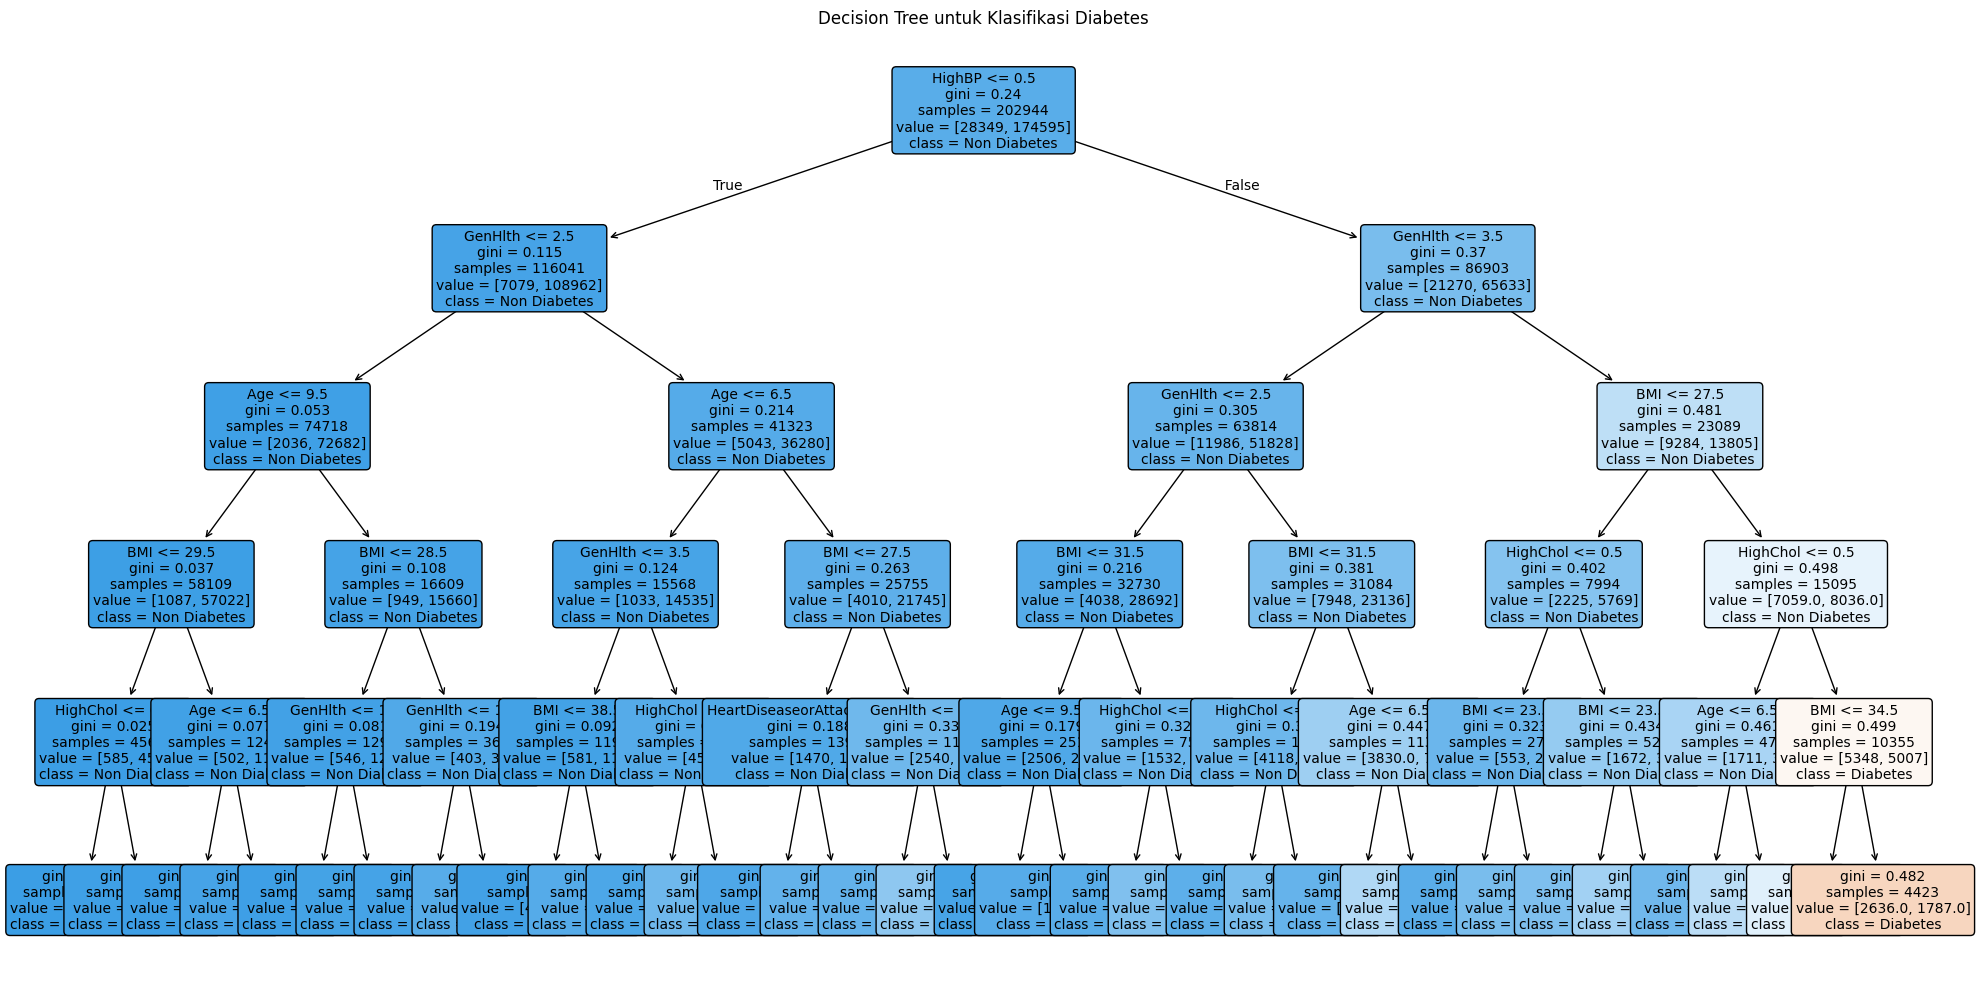

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 3. Split data training dan testing ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 5. Evaluasi Model ===
y_pred = clf.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Non Diabetes", "Diabetes"]))

# === 6. Visualisasi Struktur Pohon ===
plt.figure(figsize=(20, 10))  # Ubah ukuran jika terlalu besar
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree untuk Klasifikasi Diabetes")
plt.tight_layout()
plt.show()


### Modelling klasifikasi dataset diabetes menggunakan KNN

## Klasifikasi Diabetes dengan Model K-Nearest Neighbors (KNN)

Dalam pemodelan ini, kami memanfaatkan **Model K-Nearest Neighbors (KNN)** untuk memprediksi status kesehatan pasien, yaitu apakah mereka **Diabetes atau Non Diabetes**. Prediksi ini didasarkan pada kombinasi **fitur-fitur relevan** seperti **usia, jenis kelamin, dan gejala klinis spesifik** meliputi poliuria, polidipsia, serta penurunan berat badan mendadak.

KNN adalah algoritma ***instance-based learning*** yang unik. Alih-alih membangun model eksplisit seperti aturan atau pohon keputusan, KNN bekerja dengan **mencari "tetangga" terdekat** di ruang fitur. Artinya, ketika sebuah data baru datang, KNN akan memprediksinya berdasarkan kelas dari data latih yang memiliki karakteristik paling mirip dengannya.


### Alur Implementasi Model KNN

Proses implementasi model KNN mengikuti serangkaian tahapan penting:

#### 1. Pembagian Dataset: Data Latih dan Data Uji

Layaknya metode *supervised learning* lainnya, langkah fundamental pertama adalah **memisahkan dataset diabetes** menjadi dua segmen krusial:

* **Data Latih (Training Set):** Bagian data ini berfungsi sebagai **basis referensi** bagi algoritma KNN. Model akan "mempelajari" pola dan hubungan dari data ini untuk mengidentifikasi tetangga terdekat di kemudian hari.
* **Data Uji (Testing Set):** Setelah model dilatih, bagian data ini digunakan untuk **mengevaluasi seberapa baik performa model** pada data yang belum pernah dilihat sebelumnya, memberikan gambaran realistis tentang kemampuannya menggeneralisasi.

Dalam studi ini, kami mengadopsi **rasio pembagian standar 80% untuk data latih dan 20% untuk data uji**. Meskipun ini adalah praktik umum yang efektif, rasio tersebut dapat disesuaikan berdasarkan ukuran dan karakteristik distribusi spesifik dari dataset.


#### 2. Pra-pemrosesan Data

Agar algoritma KNN dapat beroperasi secara optimal dan akurat, **serangkaian langkah pra-pemrosesan** data wajib dilakukan:

* **Transformasi Variabel Target:** Kolom 'class' yang awalnya menggunakan representasi numerik (0 dan 1) **dikonversi menjadi label kategorikal** yang lebih mudah dibaca dan dipahami: **0 menjadi 'Non Diabetes' dan 1 menjadi 'Diabetes'**.
* **Pengodean Fitur Kategorikal:** Jika dataset mengandung **fitur kategorikal** (misalnya 'Gender', 'Polyuria', dll.), maka fitur-fitur ini harus **di-*encode* menjadi bentuk numerik**. Ini esensial agar semua fitur dapat diikutsertakan dalam perhitungan jarak, yang merupakan inti dari cara kerja KNN.
* **Normalisasi Skala Fitur (Scaling):** Ini adalah langkah **sangat krusial** untuk KNN. Fitur-fitur numerik **dinormalisasi menggunakan `StandardScaler`**. KNN sangat **sensitif terhadap skala fitur**; tanpa normalisasi, fitur dengan rentang nilai yang jauh lebih besar dapat secara tidak proporsional mendominasi perhitungan jarak antara titik-titik data, mengaburkan kontribusi fitur lain yang mungkin sama pentingnya.


#### 3. Mekanisme Kerja KNN

Berbeda dengan model seperti Decision Tree yang secara eksplisit membangun aturan, **KNN beroperasi berdasarkan prinsip kemiripan**. Model ini **menyimpan seluruh data latih** dan membuat prediksi berdasarkan jarak:

1.  **Perhitungan Jarak:** Untuk setiap titik data baru (dari data uji), model akan **menghitung jaraknya** (misalnya, menggunakan jarak Euclidean) ke **semua titik data yang ada di data latih**.
2.  **Identifikasi Tetangga Terdekat:** Selanjutnya, model akan **mengidentifikasi `k` tetangga terdekat** dari titik data baru tersebut. Nilai `k` ini adalah parameter yang kita tentukan sebelumnya.
3.  **Proses Voting:** Kelas dari titik data baru ditentukan melalui **proses *voting*** di antara `k` tetangga terdekat. Kelas yang paling sering muncul di antara tetangga-tetangga tersebut akan menjadi **prediksi akhir** untuk data baru tersebut.

Sebagai ilustrasi, jika kita mengatur `k=5` dan dari lima tetangga terdekat, tiga di antaranya adalah pasien Diabetes dan dua adalah Non Diabetes, maka model akan memprediksi pasien baru tersebut sebagai **Diabetes**.


#### 4. Evaluasi Performa Model

Setelah pelatihan, performa model KNN dievaluasi secara komprehensif menggunakan metrik standar:

* **Akurasi:** Mengukur **proporsi prediksi yang benar** dibandingkan dengan total prediksi pada data uji, memberikan indikasi keseluruhan ketepatan model.
* **Classification Report:** Menyediakan analisis yang lebih mendalam per kelas, mencakup **Precision** (seberapa akurat prediksi positif), **Recall** (seberapa banyak kasus positif yang berhasil dideteksi), dan **F1-score** (rata-rata harmonik Precision dan Recall).
* **Confusion Matrix:** Sebuah representasi tabel yang **memvisualisasikan jumlah prediksi benar dan salah** untuk setiap kategori, membantu mengidentifikasi jenis kesalahan yang dilakukan model (misalnya, *false positives* atau *false negatives*).

Penting juga untuk **melakukan eksperimen dengan berbagai nilai `k`** (misalnya, k=3, k=5, k=7) untuk menemukan konfigurasi yang memberikan performa klasifikasi optimal bagi dataset tertentu.


### Kesimpulan

Model **K-Nearest Neighbors (KNN)** menunjukkan potensi yang signifikan dalam mengklasifikasikan status diabetes berdasarkan gejala dan karakteristik pasien. Dengan asumsi data telah melalui **pra-pemrosesan yang tepat**, terutama **encoding dan normalisasi**, KNN bisa menjadi solusi klasifikasi yang **efektif dan relatif mudah diimplementasikan**. Keunggulannya terutama terlihat ketika **kecepatan dan interpretasi yang lugas** menjadi pertimbangan utama.

Model KNN ini dapat menjadi **alat pendukung keputusan (decision support system)** yang berharga bagi tenaga medis. Ini memungkinkan **identifikasi potensi diabetes pada pasien secara dini** tanpa perlu menunggu pemeriksaan laboratorium yang lebih kompleks di tahap awal diagnosis, sehingga mempercepat proses penanganan dan intervensi.

Akurasi: 0.8467951750236519

=== Classification Report ===
              precision    recall  f1-score   support

Non Diabetes       0.40      0.21      0.27      6997
    Diabetes       0.88      0.95      0.91     43739

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736



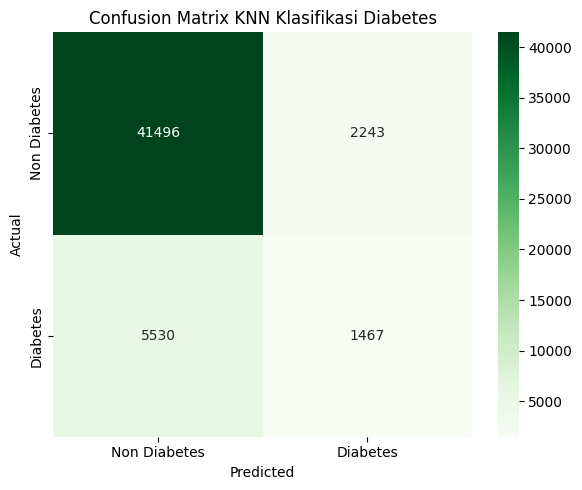

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# === 4. Normalisasi fitur (wajib untuk KNN) ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 5. Training model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# === 6. Prediksi dan Evaluasi ===
y_pred = knn.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Non Diabetes", "Diabetes"]))

# === 7. Visualisasi Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=["Non Diabetes", "Diabetes"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Non Diabetes", "Diabetes"],
            yticklabels=["Non Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Klasifikasi Diabetes")
plt.tight_layout()
plt.show()

### Modelling klasifikasi dataset diabetes menggunakan naive bayes

## Membangun Model Klasifikasi Diabetes dengan Gaussian Naive Bayes

Dalam pemodelan ini, kita akan menerapkan **Model Gaussian Naive Bayes** untuk memprediksi status diabetes pada pasien. Model ini akan belajar dari berbagai karakteristik seperti usia, jenis kelamin, serta gejala klinis seperti poliuria (sering buang air kecil), polidipsia (sering haus), dan penurunan berat badan mendadak. Target klasifikasi kita adalah dua kategori: **Non Diabetes** dan **Diabetes**.

Gaussian Naive Bayes adalah algoritma klasifikasi yang didasarkan pada **Teorema Bayes** dan **asumsi kemandirian (independensi) antar fitur**. Model ini sangat cocok untuk data numerik yang diasumsikan mengikuti **distribusi Gaussian (normal)**.


### Tahapan Kunci dalam Pemodelan

Proses membangun model Gaussian Naive Bayes melibatkan beberapa langkah fundamental:

#### 1. Pembagian Dataset: Data Latih dan Data Uji

Tahap awal yang esensial dalam setiap proyek *machine learning* adalah **memisahkan dataset** menjadi dua segmen utama:

* **Data Latih (Train Set):** Bagian data ini berfungsi sebagai "materi pembelajaran" bagi model. Di sinilah model akan mengidentifikasi pola dan parameter yang diperlukan untuk melakukan prediksi.
* **Data Uji (Test Set):** Setelah model dilatih, bagian data ini digunakan untuk **mengukur kinerja model** pada data yang belum pernah dilihat sebelumnya. Ini memberikan evaluasi yang objektif tentang kemampuan generalisasi model.

Dalam implementasi ini, kami menggunakan **rasio pembagian 80% untuk data latih dan 20% untuk data uji**. Meskipun ini adalah pilihan umum dan efektif, rasio ini bersifat **fleksibel** dan dapat disesuaikan berdasarkan ukuran, kompleksitas, dan karakteristik spesifik dari dataset yang digunakan.


#### 2. Perhitungan Probabilitas Awal (Prior Probability)

Setelah data dibagi, langkah pertama yang dilakukan adalah **menghitung probabilitas dasar atau *prior*** untuk setiap kelas target (Non Diabetes, Diabetes). Prosesnya sederhana:

* **Menghitung Frekuensi Kelas:** Tentukan berapa banyak contoh data latih yang termasuk ke dalam masing-masing kelas target.
* **Normalisasi Frekuensi:** Bagi jumlah contoh setiap kelas dengan total seluruh contoh di data latih.

Nilai *prior* ini mencerminkan **kemungkinan awal** seorang pasien termasuk dalam kategori Diabetes atau Non Diabetes, **sebelum mempertimbangkan fitur-fitur individu** lainnya.


#### 3. Mengestimasi Parameter Distribusi Fitur (Mean dan Standard Deviation)

Untuk setiap kelas (Diabetes dan Non Diabetes), model akan **menghitung rata-rata ($\mu$) dan standar deviasi ($\sigma$)** dari setiap fitur numerik, seperti 'Age'.

Langkah ini krusial karena **Gaussian Naive Bayes mengasumsikan bahwa nilai-nilai fitur dalam setiap kelas mengikuti distribusi normal**. Dengan menghitung rata-rata dan standar deviasi, kita mendapatkan parameter yang diperlukan untuk mendefinisikan bentuk distribusi normal tersebut.


#### 4. Menghitung Probabilitas Kondisional dengan Distribusi Gaussian

Menggunakan parameter rata-rata dan standar deviasi yang telah diestimasi, model kemudian menghitung **probabilitas kemunculan suatu nilai fitur ($x$)** untuk setiap kelas, berdasarkan **rumus fungsi kerapatan probabilitas Gaussian**:

$$P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$$

Di sini, $x$ adalah nilai fitur yang ingin kita hitung probabilitasnya, $\mu$ adalah rata-rata fitur untuk kelas tertentu, dan $\sigma$ adalah standar deviasi fitur untuk kelas tersebut. Rumus ini memberikan **probabilitas seberapa mungkin suatu nilai fitur ($x$) muncul, jika kita sudah tahu bahwa data tersebut berasal dari kelas tertentu**.


#### 5. Menghitung Probabilitas Posterior (Posterior Probability)

Setelah mendapatkan probabilitas kemunculan setiap fitur dalam suatu kelas (dari fungsi Gaussian), langkah selanjutnya adalah menghitung **probabilitas posterior**. Probabilitas ini menunjukkan **kemungkinan sebuah data termasuk dalam kelas tertentu, *mengingat* nilai-nilai fitur yang dimilikinya**. Ini dihitung dengan mengalikan semua probabilitas fitur individual dengan probabilitas *prior* kelas tersebut:

$$P(C_i|X) \propto P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)$$

Dalam rumus ini, $P(x_k|C_i)$ adalah probabilitas fitur ke-$k$ (yang dihitung dari fungsi Gaussian) untuk kelas $C_i$, dan $P(C_i)$ adalah probabilitas *prior* dari kelas $C_i$.


#### 6. Menentukan Kelas Prediksi

Setelah semua probabilitas posterior dihitung untuk masing-masing kelas (Diabetes, Non Diabetes) pada suatu data uji, model akan **memilih kelas yang memiliki nilai probabilitas posterior tertinggi** sebagai hasil prediksinya. Ini adalah keputusan akhir dari model tentang status diabetes pasien.


### Kesimpulan

Model **Gaussian Naive Bayes** terbukti sangat cocok untuk klasifikasi status diabetes karena beberapa keunggulan:

* **Efisiensi:** Model ini **cepat dan efisien** dalam pemrosesan, bahkan untuk dataset berukuran sedang.
* **Kesederhanaan:** Tidak memerlukan banyak parameter kompleks untuk diatur, serta dapat **langsung diterapkan pada data numerik** yang diasumsikan berdistribusi normal.
* **Ketahanan terhadap Independensi Fitur:** Meskipun didasarkan pada asumsi kemandirian fitur yang kuat (Naive), model ini seringkali **berkinerja baik bahkan jika asumsi tersebut tidak sepenuhnya terpenuhi** dalam praktik.

Model ini berpotensi besar untuk **mendukung deteksi dini diabetes**, terutama jika diintegrasikan ke dalam **sistem pendukung keputusan (Decision Support System)**. Dengan kemampuannya untuk memprediksi status secara cepat, diagnosis dapat dilakukan lebih awal dan intervensi medis dapat dimulai lebih cepat.

Akurasi: 0.771996215704825

=== Classification Report ===
              precision    recall  f1-score   support

Non Diabetes       0.32      0.57      0.41      6997
    Diabetes       0.92      0.81      0.86     43739

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736



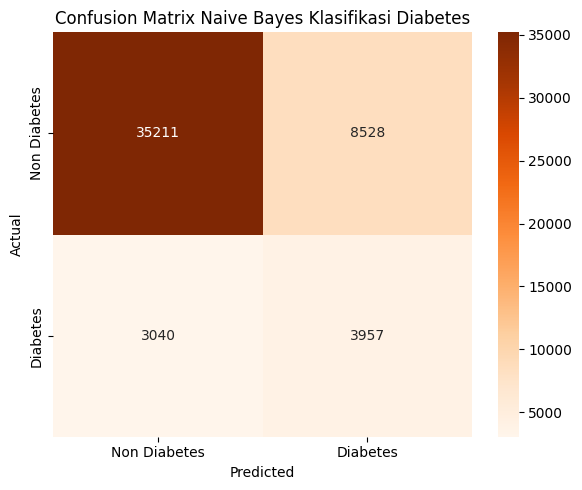

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 4. Training model Naive Bayes ===
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# === 5. Prediksi dan evaluasi ===
y_pred = model_nb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Non Diabetes", "Diabetes"]))

# === 6. Visualisasi Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=["Non Diabetes", "Diabetes"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Non Diabetes", "Diabetes"],
            yticklabels=["Non Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Naive Bayes Klasifikasi Diabetes")
plt.tight_layout()
plt.show()


## **Evaluasi Data**

Dari dataset diabetes diatas, akurasi yang didapatkan dari ketiga model klasifikasi antara lain:

* Decision Tree = 86,61%
* K-Nearest Neighbor = 84,68%
* Gaussian Naive Bayes = 77,20%

Dari ketiga model diatas dapat disimpulkan bahwa Decision Tree memiliki akurasi tertinggi yaitu 86,61%.

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
pip install gradio


In [ ]:
import joblib

# Asumsikan 'clf' adalah model Decision Tree yang sudah Anda latih sebelumnya
# dan 'X' adalah DataFrame fitur Anda yang digunakan untuk pelatihan.

# Simpan model Decision Tree
joblib.dump(clf, 'model_decision_tree.pkl')
print("Model Decision Tree berhasil disimpan sebagai 'model_decision_tree.pkl'")

# --- Opsional: Jika Anda juga menggunakan scaler atau label encoder ---
# Pastikan variabel 'scaler' dan 'le' (atau nama lain yang Anda gunakan)
# sudah didefinisikan dan digunakan di kode pra-pemrosesan data Anda.

# joblib.dump(scaler, 'scaler.pkl')
# print("Scaler berhasil disimpan sebagai 'scaler.pkl'")

# joblib.dump(le, 'label_encoder.pkl')
# print("Label Encoder berhasil disimpan sebagai 'label_encoder.pkl'")

Model Decision Tree berhasil disimpan sebagai 'model_decision_tree.pkl'


In [ ]:
import pandas as pd

# URL dataset diabetes dari GitHub (berisi 768 data pasien)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

# Unduh dan baca dataset
df = pd.read_csv(url)

# Simpan ke file lokal (opsional)
df.to_csv("diabetes.csv", index=False)

# Tampilkan 5 data pertama
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# === 1. Load Data ===
# Pastikan file 'diabetes.csv' berada di direktori yang sama
df = pd.read_csv("diabetes.csv")

# Pisahkan fitur dan target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# === 2. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 3. Model Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 4. Fungsi Prediksi ===
def prediksi_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                      BMI, DiabetesPedigreeFunction, Age):
    input_data = pd.DataFrame([[
        Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
        BMI, DiabetesPedigreeFunction, Age
    ]], columns=X.columns)

    pred = clf.predict(input_data)[0]
    proba = clf.predict_proba(input_data)[0]

    hasil = "Diabetes" if pred == 1 else "Non Diabetes"
    return f"Hasil Prediksi: {hasil} (Probabilitas: {proba[pred]:.2f})"

# === 5. Interface Gradio ===
input_components = [
    gr.Slider(0, 20, label="Pregnancies"),
    gr.Slider(0, 200, label="Glucose"),
    gr.Slider(0, 150, label="Blood Pressure"),
    gr.Slider(0, 100, label="Skin Thickness"),
    gr.Slider(0, 900, label="Insulin"),
    gr.Slider(0.0, 70.0, step=0.1, label="BMI"),
    gr.Slider(0.0, 3.0, step=0.01, label="Diabetes Pedigree Function"),
    gr.Slider(10, 100, label="Age")
]

output_component = gr.Textbox(label="Hasil Prediksi")

demo = gr.Interface(
    fn=prediksi_diabetes,
    inputs=input_components,
    outputs=output_component,
    title="Prediksi Diabetes dengan Decision Tree",
    description="Masukkan data pasien untuk memprediksi kemungkinan diabetes menggunakan model pohon keputusan."
)

# === 6. Jalankan Aplikasi Gradio ===
demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://12b1d62d43effd1bdd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
